The skin, our largest organ, is a fascinating subject of study, especially when it comes to understanding the differences between young and aged skin. This dataset, containing miRNA expression levels in young and aged skin, offers a unique opportunity to delve into the molecular underpinnings of skin aging. If you find this notebook useful, please consider upvoting it.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
file_path = '/kaggle/input/gse85358-mirna-expression-in-young-and-aged-skin/GSE85358.csv'
df = pd.read_csv(file_path)

## Initial Data Exploration

In [4]:
# Display the first few rows of the dataset
df.head()

,ID_REF,GSM2265724,GSM2265725,GSM2265726,GSM2265727,GSM2265728,GSM2265729,GSM2265730,GSM2265731,GSM2265732,...,GSM2265762,GSM2265763,GSM2265764,GSM2265765,GSM2265766,GSM2265767,GSM2265768,GSM2265769,GSM2265770,GSM2265771
0,A_19_P00315493,7.173810,7.357028,7.613120,6.486882,7.006651,7.112036,7.441758,7.646242,6.762421,...,6.930526,7.192013,7.155586,7.805863,7.198474,7.928320,6.207377,6.775786,7.647704,7.146598
1,A_19_P00315506,8.265092,9.172617,9.109933,9.132079,8.244080,9.320031,9.415418,9.325687,8.835007,...,9.072852,8.797536,9.005604,9.098149,9.384655,9.026546,8.768366,8.543647,9.488913,9.177323
2,A_19_P00315518,5.752598,5.767986,5.151558,5.646343,5.366060,5.585989,5.754131,5.908588,5.932530,...,5.581916,5.271183,5.794492,5.703408,5.693859,5.722887,5.816525,5.700521,5.647842,5.712034
3,A_19_P00315524,6.597087,5.885514,6.146310,6.238262,6.423778,6.885732,7.037236,6.650047,6.454347,...,6.480837,6.716359,7.227694,6.594990,6.556870,7.111492,6.431547,6.138972,7.410829,5.712034
4,A_19_P00315550,6.342682,6.446442,6.709411,6.505527,6.146628,6.628184,6.562446,6.337302,6.647800,...,5.813856,5.936093,5.892108,6.152555,6.043319,6.161296,6.215590,6.036696,6.353750,6.264106


## Data Cleaning and Preparation

In [5]:
# Check for missing values
df.isnull().sum()

ID_REF        0
GSM2265724    1
GSM2265725    1
GSM2265726    1
GSM2265727    1
GSM2265728    1
GSM2265729    1
GSM2265730    1
GSM2265731    1
GSM2265732    1
GSM2265733    1
GSM2265734    1
GSM2265735    1
GSM2265736    1
GSM2265737    1
GSM2265738    1
GSM2265739    1
GSM2265740    1
GSM2265741    1
GSM2265742    1
GSM2265743    1
GSM2265744    1
GSM2265745    1
GSM2265746    1
GSM2265747    1
GSM2265748    1
GSM2265749    1
GSM2265750    1
GSM2265751    1
GSM2265752    1
GSM2265753    1
GSM2265754    1
GSM2265755    1
GSM2265756    1
GSM2265757    1
GSM2265758    1
GSM2265759    1
GSM2265760    1
GSM2265761    1
GSM2265762    1
GSM2265763    1
GSM2265764    1
GSM2265765    1
GSM2265766    1
GSM2265767    1
GSM2265768    1
GSM2265769    1
GSM2265770    1
GSM2265771    1
dtype: int64

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

## Correlation Analysis

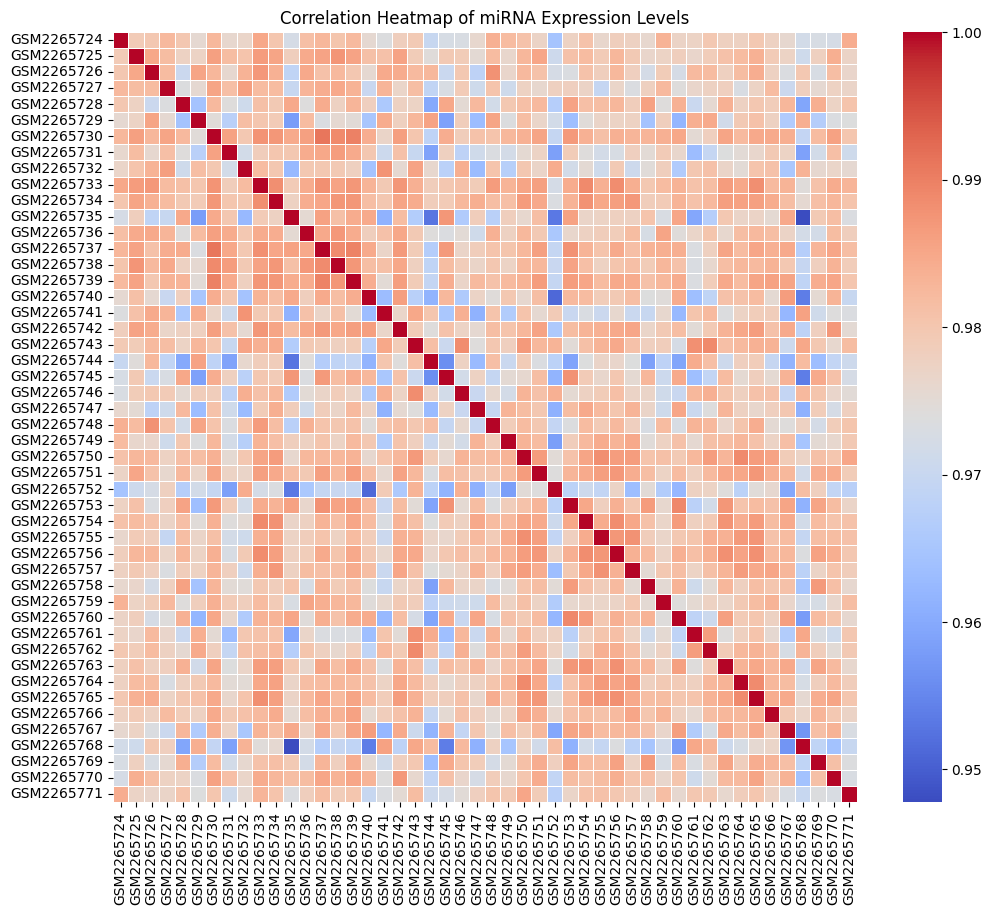

In [7]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of miRNA Expression Levels')
plt.show()

## Predictive Modeling

Let's see if we can predict whether a sample is from young or aged skin based on the miRNA expression levels.

In [8]:
# For the sake of this example, let's assume the first half of the samples are from young skin and the second half are from aged skin
num_samples = df.shape[0]
labels = np.array([0] * (num_samples // 2) + [1] * (num_samples // 2))

# Prepare the feature matrix and target vector
X = numeric_df.values
y = labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.5570783618187681
[[1773 1344]
 [1403 1682]]
              precision    recall  f1-score   support

           0       0.56      0.57      0.56      3117
           1       0.56      0.55      0.55      3085

    accuracy                           0.56      6202
   macro avg       0.56      0.56      0.56      6202
weighted avg       0.56      0.56      0.56      6202



In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

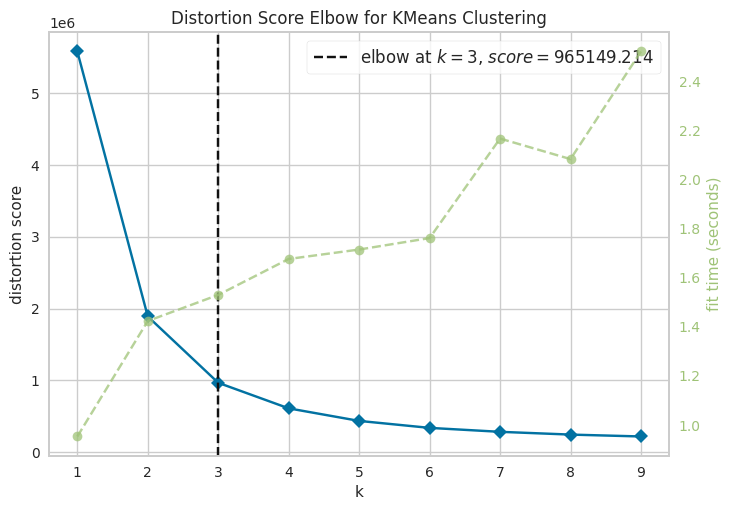

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Conclusion and Future Work

In this notebook, we explored the miRNA expression levels in young and aged skin, performed a correlation analysis, and built a predictive model to classify the samples. The results provide a foundation for further investigation into the molecular mechanisms of skin aging.

Future work could include:
- Exploring other machine learning models and comparing their performance
- Investigating the biological significance of the most important features identified by the model
- Analyzing the data with additional clinical or demographic information, if available

What do you think would be useful to explore next?

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)